<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/NewtonGeneralizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definamos el sistema usando una lista
G = (lambda x,y,z: 3*x - np.cos(y*z) - 1.5, \
     lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1, \
     lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975)

In [21]:
G = (lambda x,y,z: 3*x - y - z - 1, \
     lambda x,y,z: -x + 3*y + z - 3, \
     lambda x,y,z: 2*x + y + 4*z - 7 )

In [22]:
G[1](4,3,1)

3

In [23]:
def GetVectorF(G,r):

    v = np.zeros(len(G))
    for i in range(v.shape[0]):
        v[i] = G[i](r[0],r[1],r[2])

    return v

In [25]:
#GetVectorF(G,np.array([0.,0.,0.]))

In [26]:
def GetJacobian(G,r,h=1e-4):

    J = np.zeros((r.shape[0],r.shape[0]))

    for i in range(r.shape[0]):
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h)


    return J.T # alejandro cuenta luego porque!!

In [34]:
def NewtonRaphson(G,r, tolerancia = 1e-10):

  it = 0
  d = 1.
  Distance = np.array([])

  while d  > tolerancia:

    F = GetVectorF(G,r)
    J = GetJacobian(G,r)
    InvJ = np.linalg.inv(J)

    r_new = r - np.dot(InvJ,F)

    diff = r_new - r
    #print(diff)
    d = np.linalg.norm(diff)
    #print(d)
    Distance = np.append(Distance,d)

    if it%50 == 0:
      print(it,d)

    r = r_new
    it += 1

  return r,Distance


In [35]:
r0 = np.array([0.,0.,0.])
r,Distance = NewtonRaphson(G,r0)
r

0 1.664820199774861
50 0.00641581760374431
100 1.4004314363128114e-05
150 5.848767319123529e-08
200 1.9235769880607797e-10


array([1., 1., 1.])

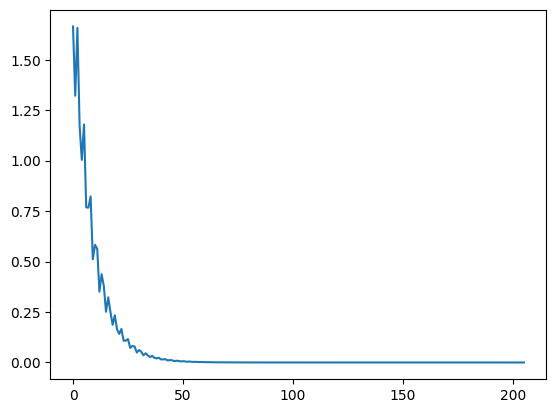

In [36]:
plt.plot(Distance)